# Fishing randomly

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import gym
import gym_fishing

import tensorflow as tf  
from tf_agents.policies import random_tf_policy 
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment

## Discrete action space

In [8]:
discount = 0.99

In [9]:
env_name = 'fishing-v0'

train_py_env = suite_gym.load(env_name, discount = discount)
eval_py_env = suite_gym.load(env_name, discount = discount)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

I create a policy that will randomly select an action for each timestep.

In [10]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(), train_env.action_spec())

In [11]:
def simulate(environment, policy):
  total_return = 0.0
  time_step = environment.reset()
  episode_return = 0.0

  output = np.zeros(shape = (1000, 4))
  for it in range(1000):
    action_step = policy.action(time_step)
    time_step = environment.step(action_step.action)
    episode_return += time_step.reward
    output[it] = (it, time_step.observation, action_step.action, episode_return)

  return output

In [12]:
out = simulate(eval_env, random_policy)

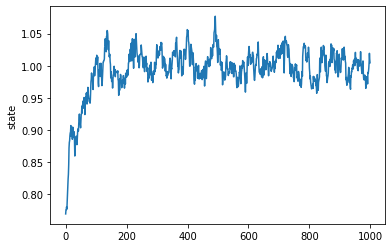

In [13]:
plt.plot(out[:,1])
plt.ylabel('state')
plt.show()

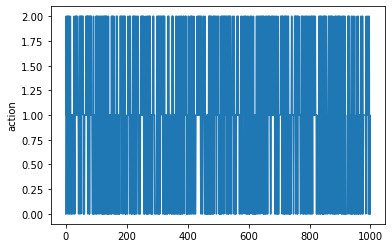

In [14]:
plt.plot(out[:,2])
plt.ylabel('action')
plt.show()

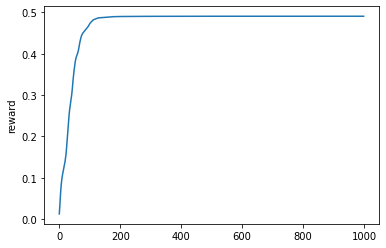

In [15]:
plt.plot(out[:,3])
plt.ylabel('reward')
plt.show()

## Continuous action space

In [16]:
env_name = 'fishing-v1'

train_py_env = suite_gym.load(env_name, discount = discount)
eval_py_env = suite_gym.load(env_name, discount = discount)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

In [17]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(), train_env.action_spec())

In [20]:
out = simulate(eval_env, random_policy)

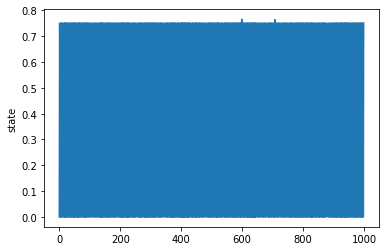

In [21]:
plt.plot(out[:,1])
plt.ylabel('state')
plt.show()

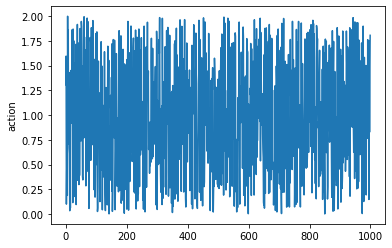

In [22]:
plt.plot(out[:,2])
plt.ylabel('action')
plt.show()

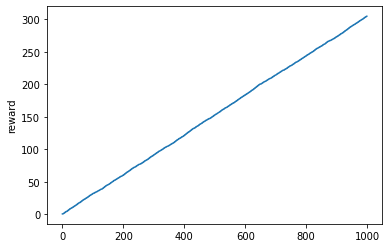

In [23]:
plt.plot(out[:,3])
plt.ylabel('reward')
plt.show()